# Newton Method
Newton raphson method 와 Gauss newton method의 차이를 알아보자.

## Background

### Jacobian
$$
{\displaystyle \mathbf {J} ={\begin{bmatrix}{\dfrac {\partial \mathbf {f} }{\partial x_{1}}}&\cdots &{\dfrac {\partial \mathbf {f} }{\partial x_{n}}}\end{bmatrix}}={\begin{bmatrix}{\dfrac {\partial f_{1}}{\partial x_{1}}}&\cdots &{\dfrac {\partial f_{1}}{\partial x_{n}}}\\\vdots &\ddots &\vdots \\{\dfrac {\partial f_{m}}{\partial x_{1}}}&\cdots &{\dfrac {\partial f_{m}}{\partial x_{n}}}\end{bmatrix}} \in \mathbb{R}^{m \times n}.}
$$
### Hessian
$$
H(f)={\begin{bmatrix}{\frac {\partial ^{2}f}{\partial x_{1}^{2}}}&{\frac {\partial ^{2}f}{\partial x_{1}\partial x_{2}}}&\cdots &{\frac {\partial ^{2}f}{\partial x_{1}\partial x_{n}}}\\{\frac {\partial ^{2}f}{\partial x_{2}\partial x_{1}}}&{\frac {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &\vdots \\\vdots &\vdots &\ddots &\vdots \\{\frac {\partial ^{2}f}{\partial x_{n}\partial x_{1}}}&\cdots &\cdots &{\frac {\partial ^{2}f}{\partial x_{n}^{2}}}\end{bmatrix}} \in \mathbb{R}^{m \times n}. \\
= J_{f}(\nabla f(x))
$$

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from matplotlib import pyplot as plt
from copy import deepcopy
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
def gradient(f, x, epsilon=1e-7):
    """ numerically find gradients. 
    x: shape=[n] """
    grad = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        h = np.zeros_like(x, dtype=float)
        h[i] = epsilon
        grad[i] = (f(x + h) - f(x - h)) / (2 * h[i])
    return grad

def jacobian(f, m, x, h=1e-7, verbose=False):
    """ numerically find jacobian, constraint: m > 1
    f: call instance with shape=[m]
    x: shape=[n] """    
    n = len(x)
    jaco = np.zeros(shape=(m, n), dtype=float)
    for i in range(m):        
        jaco[i, :] = gradient(lambda e: f(e)[i], x, h)    
    if np.linalg.det(jaco) == 0: 
        if verbose: print('jacobian is singular, use pseudo-inverse')    
    return jaco

hessian = lambda f, n, x: jacobian(lambda e: gradient(f, e), n, x)

def hessians(fs, m, x):    
    n = len(x)
    out = np.zeros(shape=(m,n,n),dtype=float)
    for i in range(m):
        out[i,...] = hessian(lambda e: fs(e)[i], n,x)
    return out

def G(x):
    g1 = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) **2
    g2 = np.sin((x[0] ** 2) / 2 - (x[1] ** 2) / 4 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))      
    return np.array([g1, g2])

def F(x):
    """ x: np.array, shape=[3] """
    return np.dot(G(x).T, G(x)) / 2

init = np.array([0.1, 0.1])

print(jacobian(G, 2, x=init))
print(hessians(G, 2, init))

[[-5.4  18.  ]
 [-0.12  0.06]]
[[[-26.   -40.  ]
  [-40.   200.  ]]

 [[ -1.5    0.29]
  [  0.29   0.35]]]


## Newton Raphson

Gauss Newton Method 를 알기전에 우선 [Newton Raphson](https://sungwookyoo.github.io/study/newton_raphson/#summary) [Method](https://darkpgmr.tistory.com/142) 를 리뷰를 해보자.
$$
{x}^{i+1} = {x}^{i} + J^{-1}_{f}({x}^{i}) f({x}^{i})
$$
위의 식을 풀기 위해서 $J_{f}({x}^{i}) = 0 $ 를 알아야하고 그것은 다시 아래와 같이 정리된다.
$$
{x}^{i+1} = {x}^{i} + H^{-1}_{f}({x}^{i}) J_{f}({x}^{i})
$$

In [3]:
def raphson(f, m, init, epsilon=1e-7, verbose=True, history=False, max_iter=1000):
    """ Newton Raphson Method.
    f: function 
    m: the number of output dimension
    init: np.array, with dimension n """
    hessian = lambda f, n, x: jacobian(lambda e: gradient(f, e), n, x)
    
    x = deepcopy(init)
    bound = 1e-7
    memo = [x]
    while max_iter:
        H_inv = np.linalg.inv(hessian(f, n=len(x), x=x))
        update = np.matmul(H_inv, gradient(f, x))
        x = x - update
        if bound > sum(np.abs(update)):
            break
        if verbose: print("x={}, update={}".format(x, sum(np.abs(update))))
        if history: memo.append(x)
        max_iter -= 1
    if not history: return x
    return x, np.array(list(zip(*memo)))

x=[0.07 0.05], update=0.07940462557678055
x=[-0.04 -0.01], update=0.16085355967883713
x=[ 0.21 -0.02], update=0.2590853117911558
x=[0.24 0.03], update=0.0790943814369556
x=[0.31 0.08], update=0.1276261793949122
x=[0.42 0.16], update=0.1868447960829673
x=[0.51 0.24], update=0.16331185899123635
x=[0.59 0.33], update=0.1724123154746755
x=[0.66 0.42], update=0.15658549558580548
x=[0.71 0.5 ], update=0.14049129504807878
x=[0.76 0.57], update=0.11186927664348098
x=[0.79 0.62], update=0.073419737855554
x=[0.8  0.64], update=0.03426099227347203
x=[0.8  0.64], update=0.007853274296426006
x=[0.8  0.64], update=0.00035253091871263677
x=[0.8  0.64], update=1.1128948688446964e-06
initial_value: [0.1 0.1]
optimal point: [0.8  0.64]
optimal value: 0.00247135824478769


Text(0, 0.5, 'f - f*')

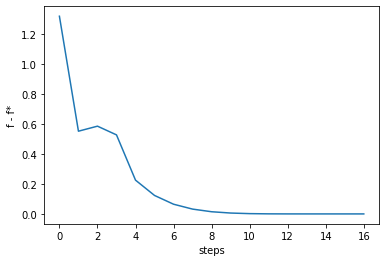

In [4]:
n_step = 100
ans, history = raphson(F, m=1, init=init, history=True, max_iter=n_step)

print("initial_value: {}".format(history[:,0]))
print("optimal point: {}".format(ans))
print("optimal value: {}".format(F(ans)))

fstar = F(ans)
fvalues = [F(vec) for vec in history.T]
order = list(range(len(history[0])))
gaps = fvalues - fstar
plt.plot(order, gaps)
plt.gca().set_xlabel('steps')
plt.gca().set_ylabel('f - f*')

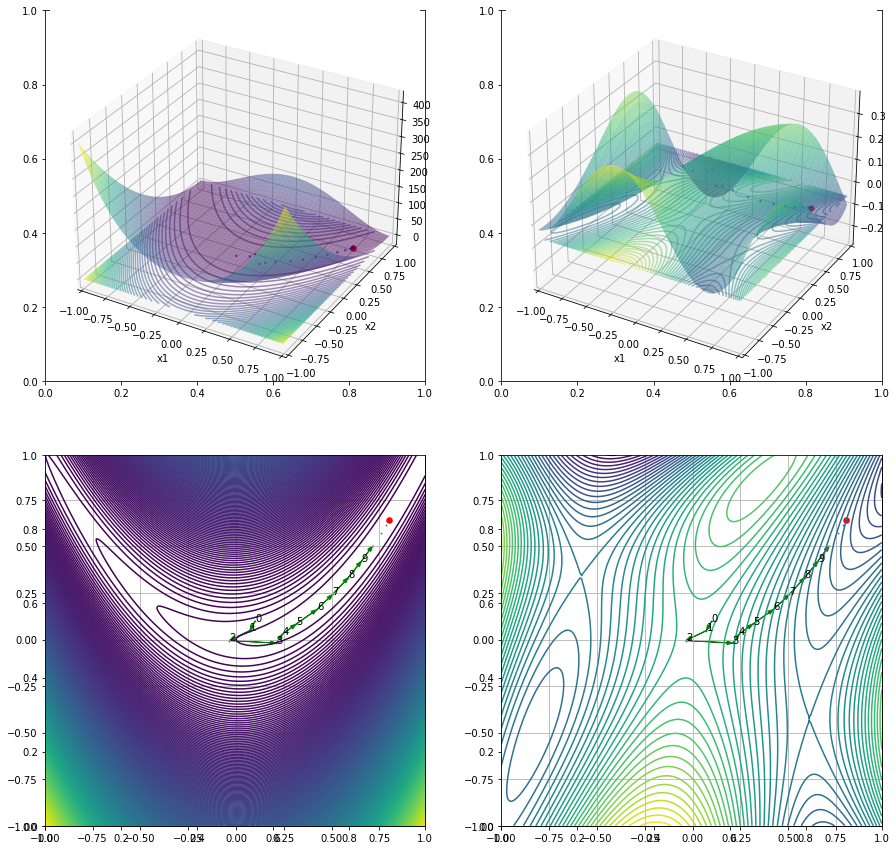

In [5]:
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)  # outer product by ones_like(x1) or ones_like(x2)
x = np.concatenate((x1[np.newaxis, :], x2[np.newaxis, :]), axis=0)

y1, y2 = np.array(G(x))
y1star, y2star = G(ans)
y1p = G(history)[0,:]
y2p = G(history)[1,:]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.cla()

ax1.plot_surface(x1, x2, y1, cmap=cm.viridis, alpha=0.5)
ax1.contour(x1, x2, y1, zdir='z', offset=y1star, levels=50, alpha=0.5)
ax1.scatter(history[0, :], history[1, :], y1p, s=2, color='b',alpha=0.5)
ax1.scatter(ans[0], ans[1], y1star, s=30, color='red')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.cla()

ax2.plot_surface(x1, x2, y2, cmap=cm.viridis, alpha=0.5)
ax2.contour(x1, x2, y2, zdir='z', offset=y2star, levels=50, alpha=0.5)
ax2.scatter(history[0, :], history[1, :], y2p, s=2, color='b',alpha=0.5)
ax2.scatter(ans[0], ans[1], y2star, s=30, color='red')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)

ax3 = fig.add_subplot(2, 2, 3)
ax3.cla()
ax3.contour(x1, x2, y1, levels=500, cmap=cm.viridis, alpha=1)
ax3.scatter(history[0, :], history[1, :], s=1.0, color='b', alpha=0.5)
order = list(range(len(history[0])))
for i, txt in enumerate(order):
    if 0 <= i < 10 or (n_step - 3 < i < n_step):        
        ax3.annotate(txt, (history[0][i], history[1][i]))
        dx = history[0][i+1] - history[0][i]
        dy = history[1][i+1] - history[1][i]
        ax3.arrow(history[0][i], history[1][i], dx, dy,
                  head_width=0.02, length_includes_head=True, color='g')
ax3.scatter(ans[0], ans[1], s=30, color='red')
ax3.grid('--')

ax4 = fig.add_subplot(2, 2, 4)
ax4.cla()
ax4.contour(x1, x2, y2, levels=50, cmap=cm.viridis, alpha=1)
ax4.scatter(history[0, :], history[1, :], s=1.0, color='b', alpha=0.5)
order = list(range(len(history[0])))
for i, txt in enumerate(order):
    if 0 <= i < 10 or (n_step - 3 < i < n_step):        
        ax4.annotate(txt, (history[0][i], history[1][i]))
        dx = history[0][i+1] - history[0][i]
        dy = history[1][i+1] - history[1][i]
        ax4.arrow(history[0][i], history[1][i], dx, dy,
                  head_width=0.02, length_includes_head=True, color='g')
ax4.scatter(ans[0], ans[1], s=30, color='red')
ax4.grid('--')

## Gauss Newton Method

Newton Raphson 의 경우 만약 $G \in \mathbb{R}$ 이라면 위의 식을 적용하는데 문제가 없겠지만,  
$G \in \mathbb{R}^{m \times n}$ 이라면 차원이 맞지 않아서 위의 식을 적용할 수 없게 된다. 

결론을 먼저 말하자면 Newton Raphson Method를 non-linear 연립방정식에 적용하기 위해서  
$J^{-1}_{G}$를 pseudo inverse 표현 $(J_{G}({x}^{i})^{\mathrm {T} } J_{G}({x}^{i}))^{-1} J_{G}({x}^{i})^{\mathrm {T} }$ 으로 바꾼것이 Gauss Newton Method이다. 

$$
\begin{align}
{x}^{i+1}  &= {x}^{i} + J^{-1}_{G}({x}^{i}) G({x}^{i}) \nonumber \\
\Delta {{x}^{i}} &= J^{-1}_{G}({x}^{i}) G({x}^{i}) \nonumber \\
J_{G}({x}^{i}) \Delta {{x}^{i}} &= G({x}^{i}) \nonumber \\
\end{align}
$$

위의식에서 pseudo inverse 표현을 구하면 다음과 같다.

$$
\begin{align}
J_{G}({x}^{i})^{\mathrm {T} } J_{G}({x}^{i}) \Delta {{x}^{i}} &= J_{G}({x}^{i})^{\mathrm {T} }G({x}^{i}) \nonumber \\
\Delta {x^{i}} &=  (J_{G}({x}^{i})^{\mathrm {T} } J_{G}({x}^{i}))^{-1} J_{G}({x}^{i})^{\mathrm {T} }G({x}^{i}) \nonumber \\
\end{align}
$$

따라서 최종 업데이트 식을 아래와 같다.

$$
\begin{align}
x^{(i+1)}&=x^{i} + \Delta{x^{i}} \nonumber \\
x^{(i+1)}&=x^{i} + (J_{G}({x}^{i})^{\mathrm {T} } J_{G}({x}^{i}))^{-1} J_{G}({x}^{i})^{\mathrm {T} }G({x}^{i})
\end{align}
$$

[example](http://fourier.eng.hmc.edu/e176/lectures/NM/node21.html)

<img src="./images/gauss_newton_example.png" width=500>

In [6]:
def G(x):
    g1 = x[0]**2 - 2*x[0] + x[1]**2 - x[2] + 1
    g2 = x[0]*(x[1]**2) - x[0] - 3*x[1] + x[1]*x[2] + 2
    g3 = x[0]*(x[2]**2) - 3*x[2] + x[1]*(x[2]**2) + x[0]*x[1]
    return np.array([g1, g2, g3])

In [7]:
def pseudo_inverse(f, m, x):
    J = jacobian(f, m, x)        
    return np.dot(np.linalg.inv(np.dot(J.T,J)),J.T)

def gauss(f, m, init, verbose=True, history=False, max_iter=1000):
    """ Newton Raphson Method.
    f: function 
    m: the number of output dimension
    init: np.array, with dimension n """
        
    x = deepcopy(init)
    bound = 1e-7
    memo = [x]
    while max_iter:
        p_inv = pseudo_inverse(f, m, x)
        update = np.dot(p_inv, f(x))
        x = x - update
        if bound > sum(np.abs(update)):
            break
        if verbose: print("x={}, update={}".format(x, sum(np.abs(update))))
        if history: memo.append(x)
        max_iter -= 1
    if not history: return x
    return x, np.array(list(zip(*memo)))

iteration : 9
initial_value: [0. 0. 0.]
optimal point: [1.1  0.37 0.14]
optimal value: [ 0.  0. -0.]


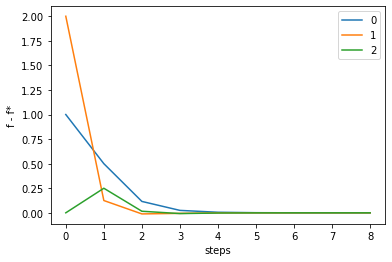

In [8]:
n_step = 50
m = 3
init = [0, 0, 0]  # inital state

ans, history = gauss(G, m=m, init=init, history=True, max_iter=n_step, verbose=False)

print("iteration : {}".format(len(history[0])))
print("initial_value: {}".format(history[:,0]))
print("optimal point: {}".format(ans))
print("optimal value: {}".format(G(ans)))

order = list(range(len(history[0])))
for i in range(m):
    fstar = G(ans)[i]
    fvalues = np.array([G(vec) for vec in history.T])[:,i]    
    gaps = fvalues - fstar    
    plt.plot(order, gaps, label=str(i))
    plt.gca().set_xlabel('steps')
    plt.gca().set_ylabel('f - f*')
plt.legend()